In [50]:
import pandas as pd

# Load the dataset (adjust file path if needed)
df = pd.read_csv("A.csv")

# EDA
# 1. Structure & Overview

In [51]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800


In [52]:
print(df.shape)
print(df.columns)
print(df.info())

(5124, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5124 non-null   object 
 1   Open       5124 non-null   float64
 2   High       5124 non-null   float64
 3   Low        5124 non-null   float64
 4   Close      5124 non-null   float64
 5   Adj Close  5124 non-null   float64
 6   Volume     5124 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.3+ KB
None


# Quality Check

In [53]:
# df.isnull().sum()
# df.nunique()
# df = df.drop_duplicates()
# df[df.duplicated()]
df.duplicated().sum()



np.int64(0)

# Summary Statistics

In [54]:
df.describe()
df[['Close','High','Low']].skew()
df.select_dtypes(include='number').skew()

Open         1.079005
High         1.094200
Low          1.067634
Close        1.082845
Adj Close    1.133663
Volume       5.488032
dtype: float64

In [55]:
import numpy as np
# Apply log transformation only
df['Volume_log'] = np.log1p(df['Volume'])  # log(1 + Volume)
df['Close_log'] = np.log1p(df['Close'])  # Add this line


In [56]:
df.select_dtypes(include='number').corr()

,Open,High,Low,Close,Adj Close,Volume,Volume_log,Close_log
Open,1.000000,0.999021,0.999181,0.998595,0.995824,-0.287776,-0.427963,0.961314
High,0.999021,1.000000,0.998277,0.999314,0.995052,-0.280499,-0.420129,0.960932
Low,0.999181,0.998277,1.000000,0.999085,0.997618,-0.295621,-0.435969,0.962407
Close,0.998595,0.999314,0.999085,1.000000,0.997035,-0.288488,-0.428089,0.962114
Adj Close,0.995824,0.995052,0.997618,0.997035,1.000000,-0.295165,-0.435016,0.954411
Volume,-0.287776,-0.280499,-0.295621,-0.288488,-0.295165,1.000000,0.868019,-0.265791
Volume_log,-0.427963,-0.420129,-0.435969,-0.428089,-0.435016,0.868019,1.000000,-0.395955
Close_log,0.961314,0.960932,0.962407,0.962114,0.954411,-0.265791,-0.395955,1.000000


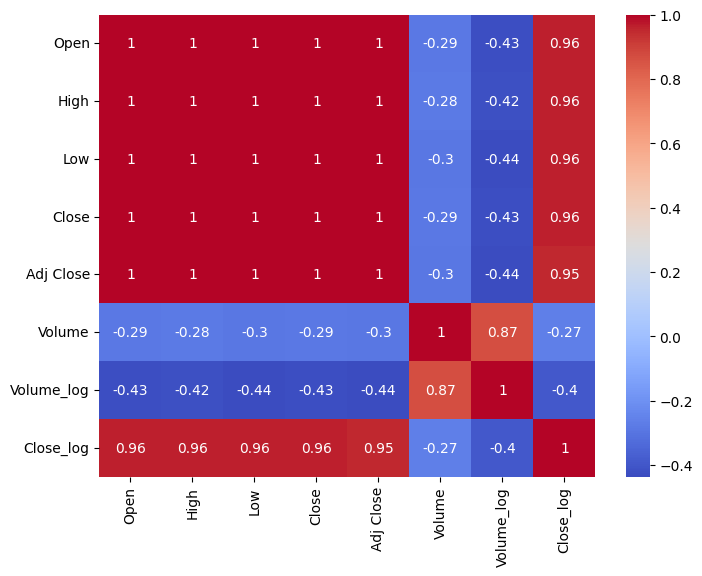

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [58]:
df.select_dtypes(include='number').cov()

,Open,High,Low,Close,Adj Close,Volume,Volume_log,Close_log
Open,3.462886e+02,3.501453e+02,3.417820e+02,3.458535e+02,3.470978e+02,-1.329075e+07,-4.292488e+00,9.045377
High,3.501453e+02,3.547394e+02,3.456146e+02,3.503002e+02,3.510351e+02,-1.311180e+07,-4.265021e+00,9.151437
Low,3.417820e+02,3.456146e+02,3.378875e+02,3.417999e+02,3.434793e+02,-1.348644e+07,-4.319427e+00,8.945133
Close,3.458535e+02,3.503002e+02,3.417999e+02,3.463915e+02,3.475713e+02,-1.332562e+07,-4.294392e+00,9.054242
Adj Close,3.470978e+02,3.510351e+02,3.434793e+02,3.475713e+02,3.508327e+02,-1.372117e+07,-4.391766e+00,9.039150
Volume,-1.329075e+07,-1.311180e+07,-1.348644e+07,-1.332562e+07,-1.372117e+07,6.159606e+12,1.161154e+06,-333548.666102
Volume_log,-4.292488e+00,-4.265021e+00,-4.319427e+00,-4.294392e+00,-4.391766e+00,1.161154e+06,2.905146e-01,-0.107913
Close_log,9.045377e+00,9.151437e+00,8.945133e+00,9.054242e+00,9.039150e+00,-3.335487e+05,-1.079125e-01,0.255673


# Time Series Preparation

In [59]:
#  Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date (oldest → newest)
df = df.sort_values('Date')

# Set 'Date' as the DataFrame index
df = df.set_index('Date')

# Sampling & Quick View


In [60]:
# df.sample(4)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Volume_log,Close_log
Date,,,,,,,,
2020-03-19,68.540001,68.589996,64.169998,65.760002,65.593071,3430700,15.048275,4.201104
2020-03-20,65.989998,71.000000,64.959999,66.459999,66.291298,3258400,14.996747,4.211535
2020-03-23,66.800003,67.559998,62.090000,63.369999,63.209137,2989600,14.910650,4.164648
2020-03-24,65.529999,68.180000,64.599998,67.000000,66.829926,2868900,14.869440,4.219508
2020-03-25,67.120003,71.790001,65.110001,69.000000,68.824844,2628100,14.781772,4.248495
2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500,14.999536,4.313748
2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800,14.419718,4.275415
2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200,14.211734,4.299596
2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100,14.415501,4.285240


# Memory & Type Check

In [61]:
df.dtypes
df.memory_usage(deep=True)

Index         40992
Open          40992
High          40992
Low           40992
Close         40992
Adj Close     40992
Volume        40992
Volume_log    40992
Close_log     40992
dtype: int64

In [62]:
df = df.drop('Volume', axis=1) # As we have log column column
df = df.drop('Close', axis=1) # As we have log column column


In [63]:
df.columns.tolist()

['Open', 'High', 'Low', 'Adj Close', 'Volume_log', 'Close_log']

In [64]:
df.head(10)

,Open,High,Low,Adj Close,Volume_log,Close_log
Date,,,,,,
1999-11-18,32.546494,35.765381,28.612303,27.068665,17.951418,3.480425
1999-11-19,30.713520,30.758226,28.478184,24.838577,16.539047,3.397208
1999-11-22,29.551144,31.473534,28.657009,27.068665,15.699211,3.480425
1999-11-23,30.400572,31.205294,28.612303,24.607880,15.603195,3.388190
1999-11-24,28.701717,29.998211,28.612303,25.261524,15.393086,3.413532
1999-11-26,29.238197,29.685265,29.148785,25.338428,14.363286,3.416471
1999-11-29,29.327610,30.355865,29.014664,25.915169,15.220308,3.438247
1999-11-30,30.042919,30.713520,29.282904,25.953619,15.276449,3.439682
1999-12-01,30.177038,31.071173,29.953505,26.415012,14.899788,3.456743


In [65]:
# Prepare prophet DataFrame
df = df.reset_index() # If not reset, you get error, because Date were index (in previouse step we did it)
prophet_df = df[['Date', 'Close_log']].rename(columns={'Date': 'ds', 'Close_log': 'y'})
prophet_df = prophet_df.sort_values('ds')


In [66]:
train = prophet_df.iloc[:-30]   # first 5094 rows (training)
test  = prophet_df.iloc[-30:]   # last 30 rows (testing)


In [67]:
from prophet import Prophet

model = Prophet()
model.fit(train)


07:08:55 - cmdstanpy - INFO - Chain [1] start processing
07:09:04 - cmdstanpy - INFO - Chain [1] done processing


In [68]:

future = model.make_future_dataframe(periods=100, freq='D', include_history=False)
forecast = model.predict(future)
# print(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
90,2020-05-20,4.552110,4.391239,4.710272
91,2020-05-21,4.553464,4.378622,4.728008
92,2020-05-22,4.553350,4.393755,4.710788
93,2020-05-23,4.234098,4.066943,4.408275
94,2020-05-24,4.234499,4.080909,4.399479
95,2020-05-25,4.553663,4.377582,4.715486
96,2020-05-26,4.554717,4.384134,4.724324
97,2020-05-27,4.554704,4.389717,4.702352
98,2020-05-28,4.556743,4.391418,4.725961
99,2020-05-29,4.557195,4.379740,4.725679


In [69]:
print("Last training date:", train['ds'].max())
print("First forecast date:", future['ds'].min())
print("Last forecast date:", future['ds'].max())


Last training date: 2020-02-19 00:00:00
First forecast date: 2020-02-20 00:00:00
Last forecast date: 2020-05-29 00:00:00


In [70]:
pred = forecast[['ds', 'yhat']].set_index('ds')
actual = test.set_index('ds')
comparison = actual.join(pred, how='inner')
print(comparison.tail())


                   y      yhat
ds                            
2020-03-26  4.313748  4.549304
2020-03-27  4.275415  4.548051
2020-03-30  4.299596  4.543951
2020-03-31  4.285240  4.543340
2020-04-01  4.247352  4.541645


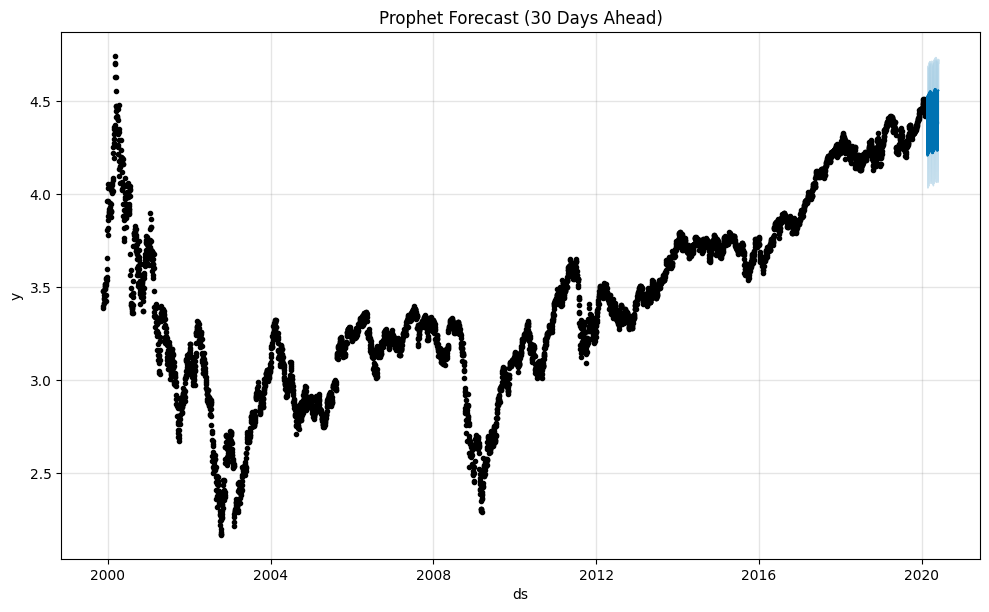

In [71]:
model.plot(forecast)
plt.title("Prophet Forecast (30 Days Ahead)")
plt.show()


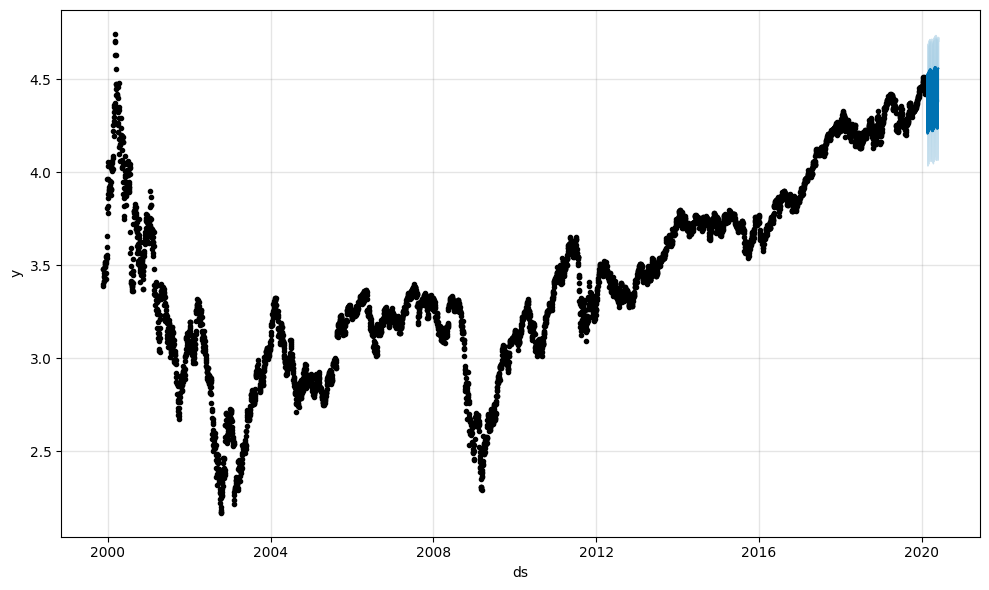

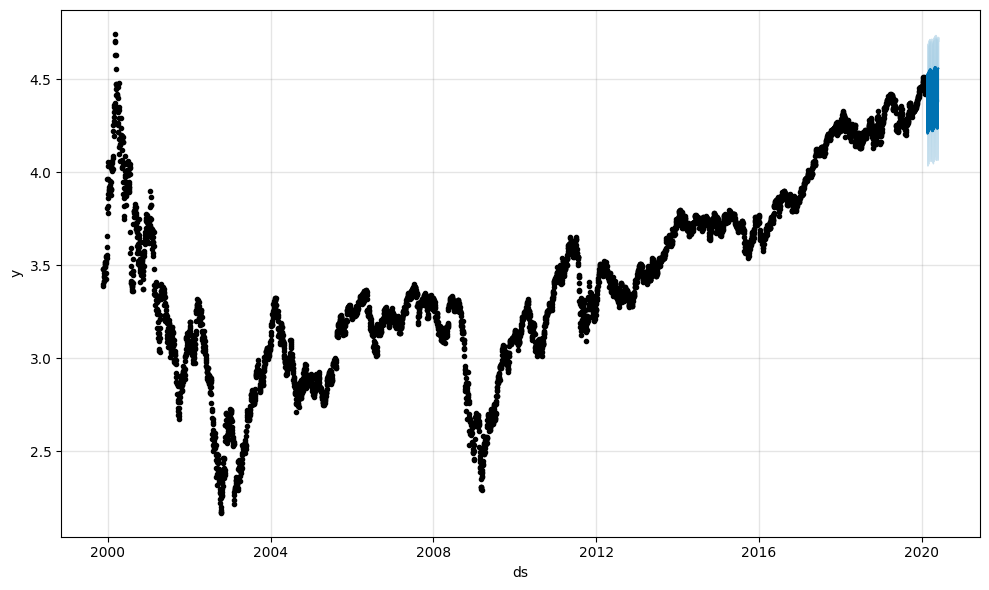

In [72]:
model.plot(forecast)

In [73]:
import joblib
joblib.dump(model, "stock_prince_prediction_model.pkl")


['stock_prince_prediction_model.pkl']

In [74]:
# Load your trained model
model = joblib.load("stock_prince_prediction_model.pkl")

In [93]:
user_data = {
    'Date': ['2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25'],
    'Close': [85.50, 85.50, 85.50, 85.50]  # Today current price
    
}



# Convert dictionary to DataFrame
unseen_df = pd.DataFrame(user_data)
unseen_df['Date'] = pd.to_datetime(unseen_df['Date'])

# ✅ CRITICAL FIX: Apply the SAME log transformation
unseen_df['Close_log'] = np.log1p(unseen_df['Close'])  # Same as training
unseen_prophet = unseen_df[['Date', 'Close_log']].rename(columns={'Date': 'ds', 'Close_log': 'y'})


# Create future dataframe with SPECIFIC DATES from user input
future_dates = pd.DataFrame({'ds': unseen_prophet['ds']})

# Make predictions for those specific dates
forecast_unseen = model.predict(future_dates)

# Compare with actual values
comparison = unseen_prophet.merge(forecast_unseen[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
comparison['error'] = comparison['y'] - comparison['yhat']

print("Prediction Results:")
print(comparison)

Prediction Results:
          ds         y      yhat  yhat_lower  yhat_upper     error
0 2020-02-20  4.460144  4.524726    4.360962    4.685175 -0.064581
1 2020-02-21  4.460144  4.525286    4.372318    4.693187 -0.065141
2 2020-02-24  4.460144  4.527190    4.351202    4.679115 -0.067046
3 2020-02-25  4.460144  4.528678    4.374989    4.688202 -0.068533


In [95]:
# Convert everything back to original price scale for easy interpretation
comparison['y_original'] = np.expm1(comparison['y'])  # Convert y back to prices
comparison['yhat_original'] = np.expm1(comparison['yhat'])  # Convert predictions back
comparison['error_original'] = comparison['y_original'] - comparison['yhat_original']

print("Final Prediction Results (Original Price Scale):")
print(comparison[['ds', 'y_original', 'yhat_original', 'error_original']])

Final Prediction Results (Original Price Scale):
          ds  y_original  yhat_original  error_original
0 2020-02-20        85.5      91.270628       -5.770628
1 2020-02-21        85.5      91.322318       -5.822318
2 2020-02-24        85.5      91.498273       -5.998273
3 2020-02-25        85.5      91.635992       -6.135992


In [ ]:
# User will input date range (using calender what ever i used from web interface)
# then user input today close price (define a range) 7 to 113